# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
USE_MULTI_AGENT_ENV = True


# select this option to load version 1 (with a single agent) of the environment
# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

if USE_MULTI_AGENT_ENV:
    env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
else:
    env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# counter = 0
# print('states', states.shape)
# while True:
#     counter += 1
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('round {}, Total score (averaged over agents) this episode: {}'.format(counter,np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### Model Definition (Actor & Critic)


In [7]:
# Model Definition
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc_units=256):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc_units)
        self.fc2 = nn.Linear(fc_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        return F.tanh(self.fc2(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=256, fc3_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc4.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.leaky_relu(self.fcs1(state))
        x = torch.cat((xs, action), dim=1)
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        return self.fc4(x)


# Agent Definition (DDPG)

In [8]:
# Agent Definition
import numpy as np
import random
import copy
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR =  5e-4         # learning rate of the actor 
LR_CRITIC = 1e-3 #3e-4        # learning rate of the critic
WEIGHT_DECAY = 0#0.0001   # L2 weight decay


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed, warm_up, num_learns_per_step=1, lr_actor=LR_ACTOR):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.warm_up = warm_up
        self.num_learns_per_step = num_learns_per_step
        print('Agent Initialized with num_learns_per_step=', num_learns_per_step)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=lr_actor)
        self.lr_actor = lr_actor

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(action_size, random_seed)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        
    def set_lr_actor(self, new_lr_actor):
        self.lr_actor = new_lr_actor
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=new_lr_actor)
    
    def act(self, state, add_noise=True):
        if USE_MULTI_AGENT_ENV:
            return self._act_20(state, add_noise)
        else:
            return  self._act_single(state, add_noise)
            
    def step(self, state, action, reward, next_state, done, should_learn=True):
        if USE_MULTI_AGENT_ENV:
            self._step_20(state, action, reward, next_state, done, should_learn)
        else:
            self._step_single(state, action, reward, next_state, done)
            
    def _step_single(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > self.warm_up: 
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)
    
    def _step_20(self, state_20, action_20, reward_20, next_state_20, done_20, should_learn):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        for i_agent in range(20):
            self.memory.add(state_20[i_agent], action_20[i_agent], reward_20[i_agent], next_state_20[i_agent], done_20[i_agent])
        if not should_learn:
            return
        for i_update in range(self.num_learns_per_step):
            # Learn, if enough samples are available in memory
            if len(self.memory) > self.warm_up: #BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA, do_soft_update= True)

    def _act_single(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def _act_20(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        actions_20 = []
        with torch.no_grad():
            for i_agent in range(20):
                action = self.actor_local(state[i_agent].unsqueeze(0)).cpu().data.numpy()
                if add_noise:
                    action += self.noise.sample()
                actions_20.append(action.flatten() )
        self.actor_local.train()
        actions_20 = np.asarray(actions_20) 
        return np.clip(actions_20, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma, do_soft_update=True):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        # added clipping, but clipping seems not help, disable
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        if do_soft_update:
            # ----------------------- update target networks ----------------------- #
            self.soft_update(self.critic_local, self.critic_target, TAU)
            self.soft_update(self.actor_local, self.actor_target, TAU)                     
        
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

# DDPG Definition

In [9]:
def ddpg(agent, n_episodes, max_t=1000):
    model_not_saving = 0
    model_not_improving = 0
    print('--------start learning----------lr_actor={}; num_step={}'.format(agent.lr_actor, agent.num_learns_per_step))
    last_best_score = LAST_BEST_SCORE
    last_avg_score = 0
    scores_deque = deque(maxlen=100)
    num_episodes_over_30 = 0
    for i_episode in range(1, n_episodes+1):
        state_20 = env.reset()[brain_name].vector_observations
        agent.reset()
        agent_20_avg_score = 0
        for t in range(max_t):
            # make add_noise=True when early in the training stage;
            # I changed it False at the end to verify the agent solves the environemnt
            actions_20 = agent.act(state=state_20, add_noise=True) 
            env_info= env.step(actions_20)[brain_name]
            next_states_20 = env_info.vector_observations   # get the next state
            reward_20 = env_info.rewards                   # get the reward
            done_20 = env_info.local_done 
            should_learn =  True
            if model_not_improving >0 or model_not_saving>1 or last_avg_score > 15 : 
                should_learn = not (t % 30 < 20)
                if model_not_saving > 5:
                    should_learn =  not (t % 40 < 30)
                if model_not_saving > 10:
                    should_learn =  not (t % 60 < 50)
            # if model has not been improving, then update the networks 10 times after every 20 timesteps
            agent.step(state_20, actions_20, reward_20, next_states_20, done_20, should_learn )
            state_20 = next_states_20
            agent_20_avg_score += np.mean(reward_20)
            if np.any(done_20):
                break 
        scores_deque.append(agent_20_avg_score)
        avg_score =  np.mean(scores_deque)
        if avg_score <= last_avg_score:
            model_not_improving +=1
        else:
            model_not_improving = 0
        last_avg_score = avg_score
        final_scores.append(avg_score)
        if last_best_score < avg_score:
            print('[...Saving model checkpoint with average score] :',avg_score, CHECKPOINT_PATH_ACTOR_TO_WRITE)
            last_best_score = avg_score
            torch.save(agent.actor_local.state_dict(), CHECKPOINT_PATH_ACTOR_TO_WRITE)
            torch.save(agent.critic_local.state_dict(), CHECKPOINT_PATH_CRITIC_TO_WRITE)  
            model_not_saving = 0
        else:
            model_not_saving += 1
            
        print('\rEpisode {}\tAverage Score: {:.2f} ; model_not_improving {}; model_not_saving {}; Buffer {}.'.format(i_episode, avg_score, model_not_improving,model_not_saving, agent.memory.__len__()))
               
        if agent_20_avg_score >= 30:
            num_episodes_over_30 += 1
            if num_episodes_over_30 > 100:
                print('\rSolved environment after {} Episodes\t Last Average Score: {:.2f}'.format(i_episode+100, avg_score))
                return final_scores
            
        if agent.num_learns_per_step>1 and (model_not_saving >2 or (i_episode >=40 and avg_score <= 15)) :
            # reduce learning with each step by half
            agent.num_learns_per_step = max(1,int(agent.num_learns_per_step/2))
            print('!!reduce num_learns_per_step to {} because model_not_saving {}'.format(agent.num_learns_per_step, model_not_saving))
            model_not_saving = 0
            
        if agent.lr_actor != MIN_LR_ACTOR and (model_not_saving >=15 or model_not_improving >4):
            agent.set_lr_actor(max(MIN_LR_ACTOR, agent.lr_actor-1e-5))
            print('!! Reduce actor learning rate to:{} because model_not_improving {} or model_not_saving {}'.format(agent.lr_actor, model_not_improving,model_not_saving ))
            model_not_improving =0
            model_not_saving = 0
            
        if model_not_improving >5 and model_not_saving >10:
            agent.set_lr_actor(1.5e-4)
            print('!! Increase actor learning rate to:{} because model_not_improving {} or model_not_saving {}'.format(agent.lr_actor, model_not_improving,model_not_saving ))

    print('----- Finish Training for {} Episodes!-------'.format(n_episodes))    
    return final_scores
print('ready to train')
final_scores=[]


ready to train


# # Milestone 1:Training Agent (first 100 episodes)

Try 100 episodes first. This is neccessary for the purpose of plotting the whole training process. Wait for first 100 results to ajust hyper paramters otherwise I would have to restart training from scratch everytime. The workspace is never working again after being interrupted. 

In [10]:
agent = Agent(num_learns_per_step=5, warm_up = int(1e2), state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, random_seed=0)
from workspace_utils import active_session

CHECKPOINT_PATH_ACTOR = 'checkpoint_actor_5_25_v2.pth' # best score 36.7
CHECKPOINT_PATH_CRITIC = 'checkpoint_critic_5_25_v2.pth'
LAST_BEST_SCORE =0

with active_session():
    solved_scores = ddpg(n_episodes= 100) 


Agent Initialized with num_learns_per_step= 5
--------start learning----------
Episode 1	Average Score: 0.64
saving model checkpoint with average score : 0.636499985773
Episode 2	Average Score: 0.99
saving model checkpoint with average score : 0.986999977939
Episode 3	Average Score: 1.21
saving model checkpoint with average score : 1.20849997299
Episode 4	Average Score: 1.35
saving model checkpoint with average score : 1.34587496992
Episode 5	Average Score: 1.55
saving model checkpoint with average score : 1.54859996539
Episode 6	Average Score: 1.86
saving model checkpoint with average score : 1.85533329186
Episode 7	Average Score: 2.05
saving model checkpoint with average score : 2.05378566838
Episode 8	Average Score: 2.24
saving model checkpoint with average score : 2.24087494991
Episode 9	Average Score: 2.47
saving model checkpoint with average score : 2.46927772259
Episode 10	Average Score: 2.65
saving model checkpoint with average score : 2.65489994066
Episode 11	Average Score: 2.

In [10]:
# print scores after first 100 episodes
with open('first100.txt', 'w') as filehandle:
    for score in final_scores:
        filehandle.write('%s,' % score)

## Plot score for Milestone1

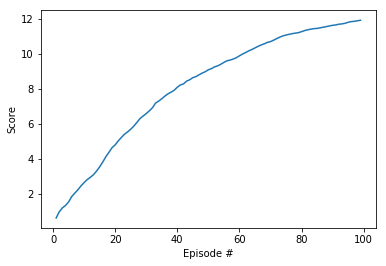

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(final_scores)+1), final_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Milestone 2: Resume Training Agent for another 100 episodes
- When training from loading snapshot(buffer size is 0), increase warmup threshold to 1e5 to avoid bad updates. Otherwise if continuing (buffer is full) , increase num_learns_per_step to 5 to speed up learning, since in the previous 100 episodes reply buffer should have been updated.
- Also if agent has not been learning for 3 episodes, instead of updating network in every timestep, only update 10 times after every 20 timesteps. This way the training can be more stable.
- reduce actor learning rate to 1.5e-4
- enable clipping for critic local network

In [11]:
agent_2 = Agent(lr_actor=1.5e-4,num_learns_per_step=1, warm_up = int(3e4), state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, random_seed=0)


In [15]:
from workspace_utils import active_session

CHECKPOINT_PATH_ACTOR = 'checkpoint_actor_5_25_v2.pth' 
CHECKPOINT_PATH_CRITIC = 'checkpoint_critic_5_25_v2.pth'
CHECKPOINT_PATH_ACTOR_TO_WRITE = 'checkpoint_actor_5_25_v2_phase2_v3.pth' 
CHECKPOINT_PATH_CRITIC_TO_WRITE = 'checkpoint_critic_5_25_v2_phase2_v3.pth'
LAST_BEST_SCORE =11.93
MIN_LR_ACTOR = 1e-4

def load_checkpoint(agent, actor_path, critic_path):
    agent.actor_target.load_state_dict(torch.load(actor_path))
    agent.actor_local.load_state_dict(torch.load(actor_path))
    agent.critic_local.load_state_dict(torch.load(critic_path))
    agent.critic_target.load_state_dict(torch.load(critic_path))
    print('*****realoaded saved checkpoint******', actor_path, critic_path)


with active_session():
    load_checkpoint(agent=agent_2, actor_path=CHECKPOINT_PATH_ACTOR, critic_path=CHECKPOINT_PATH_CRITIC)
    solved_scores = ddpg(agent=agent_2, n_episodes= 500) 
    

Agent Initialized with num_learns_per_step= 1
*****realoaded saved checkpoint****** checkpoint_actor_5_25_v2.pth checkpoint_critic_5_25_v2.pth
--------start learning----------lr_actor=0.00015; num_step=1
[...Saving model checkpoint with average score] : 14.8249996686 checkpoint_actor_5_25_v2_phase2_v3.pth
Episode 1	Average Score: 14.82 ; model_not_improving 0; model_not_saving 0; Buffer 20000.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:152: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[...Saving model checkpoint with average score] : 14.8477496681 checkpoint_actor_5_25_v2_phase2_v3.pth
Episode 2	Average Score: 14.85 ; model_not_improving 0; model_not_saving 0; Buffer 40000.
Episode 3	Average Score: 14.42 ; model_not_improving 1; model_not_saving 1; Buffer 60000.
Episode 4	Average Score: 14.43 ; model_not_improving 0; model_not_saving 2; Buffer 80000.
Episode 5	Average Score: 14.50 ; model_not_improving 0; model_not_saving 3; Buffer 100000.
Episode 6	Average Score: 14.41 ; model_not_improving 1; model_not_saving 4; Buffer 120000.
Episode 7	Average Score: 14.36 ; model_not_improving 2; model_not_saving 5; Buffer 140000.
Episode 8	Average Score: 14.73 ; model_not_improving 0; model_not_saving 6; Buffer 160000.
Episode 9	Average Score: 14.71 ; model_not_improving 1; model_not_saving 7; Buffer 180000.
[...Saving model checkpoint with average score] : 15.0495496636 checkpoint_actor_5_25_v2_phase2_v3.pth
Episode 10	Average Score: 15.05 ; model_not_improving 0; model_not_sa

In [22]:
final_scores_phase2 = copy.deepcopy(final_scores)
with open('first_phase2.txt', 'w') as filehandle:
    for score in final_scores_phase2:


## Plot score for Milestone2

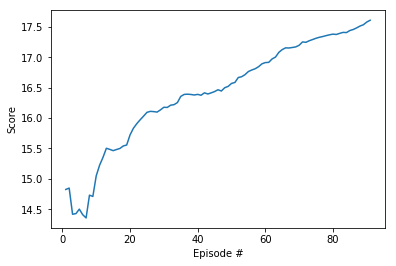

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(final_scores)+1), final_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Milestone3: Train Agent till reaching score 30


In [14]:
from workspace_utils import active_session

CHECKPOINT_PATH_ACTOR = 'checkpoint_actor_5_25_v2_phase2_v3.pth' 
CHECKPOINT_PATH_CRITIC = 'checkpoint_critic_5_25_v2_phase2_v3.pth'
CHECKPOINT_PATH_ACTOR_TO_WRITE = 'checkpoint_actor_5_25_phase3_v1.pth' 
CHECKPOINT_PATH_CRITIC_TO_WRITE = 'checkpoint_critic_5_25_phase3_v1.pth'
LAST_BEST_SCORE =17.6
MIN_LR_ACTOR = 1e-4

final_scores=[]

with active_session():
    load_checkpoint(agent=agent_2, actor_path=CHECKPOINT_PATH_ACTOR, critic_path=CHECKPOINT_PATH_CRITIC)
    solved_scores = ddpg(agent=agent_2, n_episodes= 500) 
    

*****realoaded saved checkpoint****** checkpoint_actor_5_25_v2_phase2_v3.pth checkpoint_critic_5_25_v2_phase2_v3.pth
--------start learning----------lr_actor=0.0001; num_step=1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:152: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[...Saving model checkpoint with average score] : 19.9029995551 checkpoint_actor_5_25_phase3_v1.pth
Episode 1	Average Score: 19.90 ; model_not_improving 0; model_not_saving 0; Buffer 1000000.
Episode 2	Average Score: 19.77 ; model_not_improving 1; model_not_saving 1; Buffer 1000000.
Episode 3	Average Score: 19.26 ; model_not_improving 2; model_not_saving 2; Buffer 1000000.
Episode 4	Average Score: 19.01 ; model_not_improving 3; model_not_saving 3; Buffer 1000000.
Episode 5	Average Score: 19.34 ; model_not_improving 0; model_not_saving 4; Buffer 1000000.
Episode 6	Average Score: 19.25 ; model_not_improving 1; model_not_saving 5; Buffer 1000000.
Episode 7	Average Score: 19.15 ; model_not_improving 2; model_not_saving 6; Buffer 1000000.
Episode 8	Average Score: 19.40 ; model_not_improving 0; model_not_saving 7; Buffer 1000000.
Episode 9	Average Score: 19.46 ; model_not_improving 0; model_not_saving 8; Buffer 1000000.
Episode 10	Average Score: 19.55 ; model_not_improving 0; model_not_savin

In [15]:
# save scores to file incase workspace is refreshed
with open('first_m3.txt', 'w') as filehandle:
    for score in final_scores:
        filehandle.write('%s,' % score)

## Plot score for Milestone3

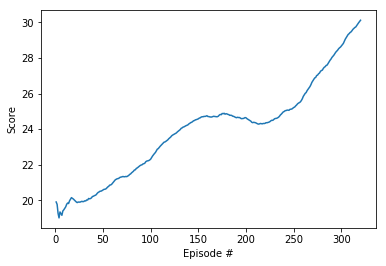

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = plt.axes()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(final_scores)+1), final_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Verification of 100 episodes reaching score 30

In [11]:
verify_agent = Agent(lr_actor=1e-4, num_learns_per_step=1, warm_up = int(1e2), state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, random_seed=0)

from workspace_utils import active_session
verification_scores=[]

# using best version of model snapshot with highest score 
CHECKPOINT_PATH_ACTOR = 'checkpoint_actor_5_25_phase3_v1.pth' 
CHECKPOINT_PATH_CRITIC = 'checkpoint_critic_5_25_phase3_v1.pth'
CHECKPOINT_PATH_ACTOR_VERIFY = 'checkpoint_actor_5_25_verify.pth' 
CHECKPOINT_PATH_CRITIC_VERIFY = 'checkpoint_critic_5_25_verify.pth'
LAST_BEST_SCORE =30.1

def ddpg_verify(agent, n_episodes, max_t=1000):
    model_not_saving = 0
    model_not_improving = 0
    print('--------start learning----------lr_actor={}; num_step={}'.format(agent.lr_actor, agent.num_learns_per_step))
    last_best_score = LAST_BEST_SCORE
    last_avg_score = 0
    scores_deque = deque(maxlen=100)
    num_episodes_over_30 = 0
    for i_episode in range(1, n_episodes+1):
        state_20 = env.reset()[brain_name].vector_observations
        agent.reset()
        agent_20_avg_score = 0
        for t in range(max_t):
            # make add_noise=True when early in the training stage;
            # I changed it False at the end to verify the agent solves the environemnt
            actions_20 = agent.act(state=state_20, add_noise=True) 
            env_info= env.step(actions_20)[brain_name]
            next_states_20 = env_info.vector_observations   # get the next state
            reward_20 = env_info.rewards                   # get the reward
            done_20 = env_info.local_done 
            agent.step(state_20, actions_20, reward_20, next_states_20, done_20, should_learn=False )
            state_20 = next_states_20
            agent_20_avg_score += np.mean(reward_20)
            if np.any(done_20):
                break 
        scores_deque.append(agent_20_avg_score)
        avg_score =  np.mean(scores_deque)
        if avg_score <= last_avg_score:
            model_not_improving +=1
        else:
            model_not_improving = 0
        verification_scores.append(avg_score)
        if last_best_score < avg_score:
            print('[...Saving model checkpoint with average score] :',avg_score)
            last_best_score = avg_score
            torch.save(agent.actor_local.state_dict(), CHECKPOINT_PATH_ACTOR_VERIFY)
            torch.save(agent.critic_local.state_dict(), CHECKPOINT_PATH_CRITIC_VERIFY)  
            model_not_saving = 0
        else:
            model_not_saving += 1
        last_avg_score = avg_score
            
        print('\rEpisode {}\tAverage Score: {:.2f} ; model_not_saving {}; num_episodes_over_30 {}.'.format(i_episode, avg_score,model_not_saving, num_episodes_over_30))
               
        if avg_score >= 30:
            num_episodes_over_30 += 1
            if num_episodes_over_30 > 100:
                print('\rSolved environment after {} Episodes\t Last Average Score: {:.2f}'.format(i_episode+100, avg_score))
                return verification_scores
        
        if (model_not_saving >10 and avg_score < 30) :
            print('!!  agent learning too slow, early return to fix agent!')
            return verification_scores
    return verification_scores

with active_session():
    load_checkpoint(agent=verify_agent, actor_path=CHECKPOINT_PATH_ACTOR, critic_path=CHECKPOINT_PATH_CRITIC)
    solved_scores = ddpg_verify(agent=verify_agent, n_episodes= 200) 

Agent Initialized with num_learns_per_step= 1
*****realoaded saved checkpoint****** checkpoint_actor_5_25_phase3_v1.pth checkpoint_critic_5_25_phase3_v1.pth
--------start learning----------lr_actor=0.0001; num_step=1
[...Saving model checkpoint with average score] : 32.9224992641
Episode 1	Average Score: 32.92 ; model_not_saving 0; num_episodes_over_30 0.
[...Saving model checkpoint with average score] : 33.2487492568
Episode 2	Average Score: 33.25 ; model_not_saving 0; num_episodes_over_30 1.
Episode 3	Average Score: 32.31 ; model_not_saving 1; num_episodes_over_30 2.
Episode 4	Average Score: 31.80 ; model_not_saving 2; num_episodes_over_30 3.
Episode 5	Average Score: 31.30 ; model_not_saving 3; num_episodes_over_30 4.
Episode 6	Average Score: 31.68 ; model_not_saving 4; num_episodes_over_30 5.
Episode 7	Average Score: 31.76 ; model_not_saving 5; num_episodes_over_30 6.
Episode 8	Average Score: 31.65 ; model_not_saving 6; num_episodes_over_30 7.
Episode 9	Average Score: 31.76 ; model_

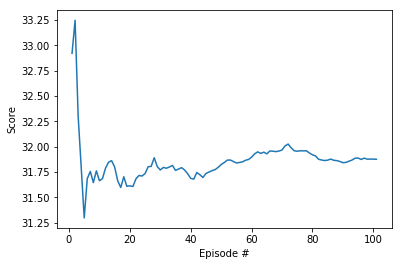

In [13]:
# Here is the plot for verification scores
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(verification_scores)+1), verification_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()